In [7]:
from pathlib import Path
import pandas as pd 
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

In [8]:
# Study data files
path = "../Jennifer's_work/Clean_CSV.csv"

# Read data and the study results
data = pd.read_csv(path)
data.head() 

,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,1,25,Female,Instagram,120,3,45,10,12,Happiness
1,2,30,Male,Twitter,90,5,20,25,30,Anger
2,3,22,Non-binary,Facebook,60,2,15,5,20,Neutral
3,4,28,Female,Instagram,200,8,100,30,50,Anxiety
4,5,33,Male,LinkedIn,45,1,5,2,10,Boredom


Cindy's Work: Analysis over Age and Time Spent

In [9]:
# Calculate what the average overall usage time is 
cd_overall_avg_time = data['Daily_Usage_Time (minutes)'].mean()
cd_overall_avg_time

96.30952380952381

In [20]:
#get the range of ages in the 'Age' column
cd_ages = data['Age'].unique()
cd_ages_sorted = sorted(cd_ages)
cd_age_amount = len(cd_ages)
print(cd_ages_sorted)
print(cd_age_amount)

[21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]
15


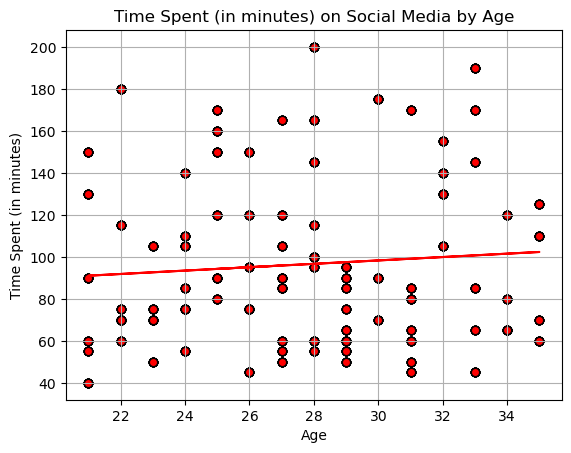

In [16]:
#Create a scatter chart to display time spent on social media by age
cd_x = data['Age']
cd_y = data['Daily_Usage_Time (minutes)']
plt.scatter(x,y,color='red',marker= 'o',edgecolors='black')
plt.xlabel('Age')
plt.ylabel('Time Spent (in minutes)')
plt.title('Time Spent (in minutes) on Social Media by Age')
#Generate a regression analysis and plot the best fit line for the graph
(cd_slope,cd_intercept,cd_rvalue,cd_pvalue,cd_std) = linregress(cd_x,cd_y)
cd_regress_values = cd_x * cd_slope + cd_intercept
cd_line_eq = "y = " + str(round(cd_slope,2)) + "x + " + str(round(cd_intercept,2))
plt.plot(cd_x,cd_regress_values,'r-')
plt.annotate(cd_line_eq,(0,0),fontsize=15,color="red")
plt.grid(True)
plt.savefig("../Images/Exhibits-Cindy/age_time_scatter.png")

In [17]:
#Run a correlation on age and time spent using pearson r
cd_correlation = st.pearsonr(cd_x,cd_y)
cd_correlation

PearsonRResult(statistic=0.08103752169850877, pvalue=0.013737831278319346)

The average age of users is: 27.833333333333332
The most middle age of users is: 28.0
The most common age of users is: 0    28
Name: Age, dtype: int64
The youngest user is: 21
The oldest user is: 35
4.011630545671717
16.093179634966354
The lower quartile of Ages is: 25.0
The upper quartile of Ages is: 32.0
The interquartile range of Ages is: 7.0
The the median of Ages is: 28.0 
Ages below 14.5 could be outliers.
Ages above 42.5 could be outliers.


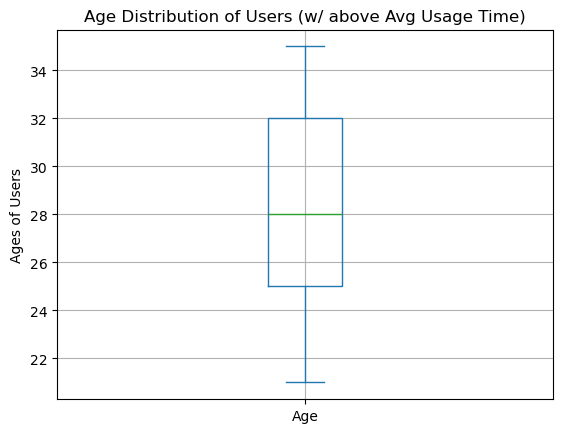

In [19]:
#Filter for only rows where the user spent above average time on social media
cd_time = data.index[data['Daily_Usage_Time (minutes)'] > cd_overall_avg_time].to_list()
cd_time2 = data.iloc[cd_time]
#Create a box plot showing the age distribution of the users who spend above average time on social media
cd_ages2 = cd_time2['Age'].unique()
cd_ages_sorted2 = sorted(cd_ages2)
cd_age_amount2 = len(cd_ages2)

cd_time2['Age'].plot(kind='box')
plt.ylabel('Ages of Users')
plt.title('Age Distribution of Users (w/ above Avg Usage Time)')
plt.grid(True)
plt.savefig("../Images/Exhibits-Cindy/age_time_box.png")
#Generate summary statistics of the age distribution
cd_ages_mean = cd_time2['Age'].mean()
cd_ages_median = cd_time2['Age'].median()
cd_ages_mode = cd_time2['Age'].mode()
cd_ages_min = cd_time2['Age'].min()
cd_ages_max = cd_time2['Age'].max()
cd_ages_var = cd_time2['Age'].var()
cd_ages_std = cd_time2['Age'].std()

print(f'The average age of users is: {cd_ages_mean}')
print(f'The most middle age of users is: {cd_ages_median}')
print(f'The most common age of users is: {cd_ages_mode}')
print(f"The youngest user is: {cd_ages_min}")
print(f"The oldest user is: {cd_ages_max}")
print(cd_ages_std)
print(cd_ages_var)

cd_quartiles = cd_time2['Age'].quantile([.25,.5,.75])
cd_lowerq = cd_quartiles[0.25]
cd_upperq = cd_quartiles[0.75]
cd_iqr = cd_upperq-cd_lowerq

print(f"The lower quartile of Ages is: {cd_lowerq}")
print(f"The upper quartile of Ages is: {cd_upperq}")
print(f"The interquartile range of Ages is: {cd_iqr}")
print(f"The the median of Ages is: {cd_quartiles[0.5]} ")

cd_lower_bound = cd_lowerq - (1.5*cd_iqr)
cd_upper_bound = cd_upperq + (1.5*cd_iqr)
print(f"Ages below {cd_lower_bound} could be outliers.")
print(f"Ages above {cd_upper_bound} could be outliers.")

End Cindy's Work